<a href="https://colab.research.google.com/github/munawarali93/NASA-Near-Earth-Objects/blob/main/NASA_near_earth_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mentor:
Kashif bari

##Team members:
1. Munawar Ali
2. Cagatay Ayhan
3. Ece KARACAM
4. Mostofa Hisham
5. Waleed Ahmed

Near-Earth Objects (NEOs) are comets and asteroids that have been nudged by the gravitational attraction of nearby planets into orbits that allow them to enter the Earth’s neighborhood. As they orbit the Sun, Near-Earth Objects occasionally approach close to Earth. We plan to develop several models for detecting whether or not a NEO is hazardous. We will likely use the data provided here: https://www.kaggle.com/datasets/sameepvani nasa-nearest-earth-objects/data
Sources: https://api.nasa.gov
https://cneos.jpl.nasa.gov/ca/

##Basic Modules

In [1]:
!git clone https://github.com/munawarali93/NASA-Near-Earth-Objects

fatal: destination path 'NASA-Near-Earth-Objects' already exists and is not an empty directory.


In [2]:
! ls -l

total 46432
-rw-r--r--  1 cgty  staff   410612 Nov 23 20:57 Decision Trees Ece & Cagatay.ipynb
drwxr-xr-x  8 cgty  staff      256 Nov 17 19:54 NASA-Near-Earth-Objects
-rw-r--r--  1 cgty  staff  3634203 Nov 17 20:34 NASADATASET.pkl
-rw-r--r--  1 cgty  staff   727330 Nov 17 20:34 NASADATASETLABELS.pkl
-rw-r--r--  1 cgty  staff    24796 Nov 17 19:54 Untitled.ipynb
-rw-r--r--@ 1 cgty  staff  9481964 Nov  1 19:57 neo.csv
-rw-r--r--  1 cgty  staff  9481964 Nov  1 19:57 neo_v2.csv


In [3]:
path = r'/content/drive/MyDrive/NASA_near_earth_objects'

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import keras
import tensorflow as tf

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics as ks_metrics

2023-11-29 16:48:36.736846: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
path = "/Users/cgty/ERDOS FALL 2023/neo.csv"
nasa = pd.read_csv(path)
print(nasa.shape)
#nasa['average_diameter'] = (nasa['est_diameter_max'] + nasa['est_diameter_min'])/2

(90836, 10)


In [6]:
nasa = nasa.drop(columns = ['orbiting_body','sentry_object', 'id', 'name']).copy()

In [7]:
nasa['hazardous'] = nasa['hazardous'].replace({True: 1, False: 0})
nasa.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


In [8]:
y = nasa['hazardous'].copy()
X = nasa.drop('hazardous', axis=1).copy()
y.shape

(90836,)

In [9]:
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# X.head()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

In [11]:
# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 9.46546635e-11  2.11654262e-10 -1.64340104e-05 -2.96530763e-08
  -2.25400800e-08]]


[[0.97627828 0.02372172]
 [0.64610437 0.35389563]
 [0.84877603 0.15122397]
 ...
 [0.88132494 0.11867506]
 [0.88612158 0.11387842]
 [0.66333313 0.33666687]]
The model accuracy is 90.1805372082783%


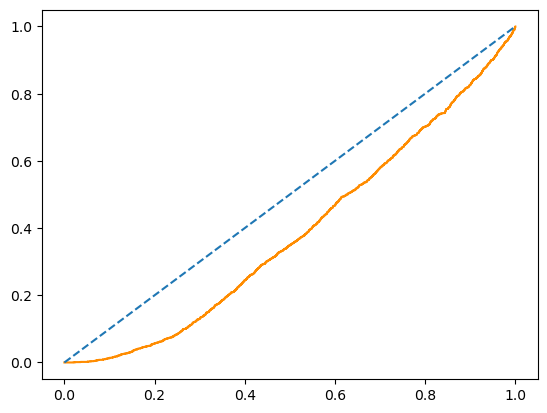

0.3844739631687044

In [12]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)
print(preds)
# Print the accuracy score the model
print("The model accuracy is %s%%"%(100*clf_logistic.score(X_test, y_test)))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = metrics.roc_auc_score(y_test, prob_default)
auc

In [13]:
def lift_curve(probabilities, title = "Model"):

    #First, sort the probabilities in decreasing order
    probabilities = -1*np.sort(-1*probabilities)
    N = np.shape(probabilities)[0]

    #Now, build the three curves for the graph like in the paper
    lift_curve_values = [sum(probabilities[0:(i+1)]) for i in range(N)]
    baseline_values = [((i+1)/N)*lift_curve_values[-1] for i in range(N)]
    best_values = [min(i+1,lift_curve_values[-1]) for i in range(N)]

    #Compute the area between the model curve and the baseline curve
    lift_area = sum([lift_curve_values[i] - baseline_values[i] for i in range(N)])
    best_area = sum([best_values[i] - baseline_values[i] for i in range(N)])
    area_ratio = lift_area/best_area

    print("The area ratio is %s"%(area_ratio))

    plt.title("Lift Curve for %s"%(title))
    plt.xlabel("# of total data points")
    plt.ylabel("# of target data points")

    plt.plot(baseline_values)
    plt.plot(best_values)
    plt.plot(lift_curve_values)

    plt.legend(["Baseline Model","Theoretically Best Model", "Actual Model"])

The area ratio is 0.4387813671365455


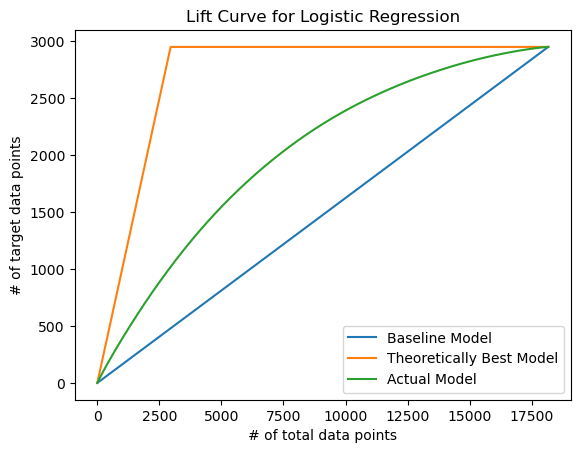

In [14]:
lift_curve(np.reshape(preds[:,1],(18168,)), "Logistic Regression")

In [15]:
#X['hazardous'] = y
#X.head()

# Decision Trees

In [16]:
#Train test split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20)

In [17]:
X_train

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
87489,0.036522,0.081666,44176.236412,1.293945e+07,24.31
72762,0.499522,1.116966,47102.313914,2.952006e+07,18.63
1564,0.021113,0.047211,34199.764842,4.821311e+07,25.50
2259,0.025384,0.056760,52534.822185,9.923187e+06,25.10
49236,0.060891,0.136157,25425.911447,3.814271e+07,23.20
...,...,...,...,...,...
16435,0.947447,2.118556,47464.174429,6.237109e+07,17.24
46069,0.160160,0.358129,30403.143290,1.666605e+07,21.10
60712,0.009651,0.021579,32872.098039,2.273876e+07,27.20
16641,0.166171,0.371569,59588.232427,5.949044e+07,21.02


In [18]:
X_test

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
66850,0.372010,0.831840,87870.477516,6.599644e+07,19.27
39368,0.269498,0.602615,21152.749810,6.925176e+07,19.97
8057,0.872077,1.950024,49291.669487,2.996642e+07,17.42
88133,0.054520,0.121910,28734.766340,1.747597e+07,23.44
7032,0.542694,1.213501,55541.537561,5.233028e+07,18.45
...,...,...,...,...,...
90794,0.104847,0.234444,51149.696785,5.450002e+07,22.02
65725,0.699125,1.563292,55031.585675,3.225700e+07,17.90
47032,0.008027,0.017949,56479.349484,6.146390e+07,27.60
35393,0.113908,0.254706,32873.609632,3.444402e+07,21.84


In [19]:
y_train

87489    0
72762    0
1564     0
2259     0
49236    0
        ..
16435    1
46069    0
60712    0
16641    0
61459    1
Name: hazardous, Length: 72668, dtype: int64

In [20]:
y_test

66850    0
39368    0
8057     0
88133    0
7032     0
        ..
90794    1
65725    0
47032    0
35393    0
65327    0
Name: hazardous, Length: 18168, dtype: int64

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [108]:
train_errors = [] # will store error values for each of the 12 decision trees on the training data 
test_errors = [] 

for max_depth in range(1, 20):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=37) 
    clf = clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train) 
    y_test_pred = clf.predict(X_test)
#     print(np.unique(y_train), np.unique(y_train_pred))
    
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    
    print(f"Max Depth: {max_depth}, Train Error: {train_error:.4f}, Test Error: {test_error:.4f}")

Max Depth: 1, Train Error: 0.0972, Test Error: 0.0977
Max Depth: 2, Train Error: 0.0873, Test Error: 0.0885
Max Depth: 3, Train Error: 0.0872, Test Error: 0.0884
Max Depth: 4, Train Error: 0.0871, Test Error: 0.0883
Max Depth: 5, Train Error: 0.0870, Test Error: 0.0883
Max Depth: 6, Train Error: 0.0868, Test Error: 0.0882
Max Depth: 7, Train Error: 0.0860, Test Error: 0.0883
Max Depth: 8, Train Error: 0.0853, Test Error: 0.0889
Max Depth: 9, Train Error: 0.0841, Test Error: 0.0895
Max Depth: 10, Train Error: 0.0826, Test Error: 0.0904
Max Depth: 11, Train Error: 0.0804, Test Error: 0.0902
Max Depth: 12, Train Error: 0.0781, Test Error: 0.0902
Max Depth: 13, Train Error: 0.0759, Test Error: 0.0921
Max Depth: 14, Train Error: 0.0731, Test Error: 0.0923
Max Depth: 15, Train Error: 0.0700, Test Error: 0.0931
Max Depth: 16, Train Error: 0.0667, Test Error: 0.0947
Max Depth: 17, Train Error: 0.0629, Test Error: 0.0956
Max Depth: 18, Train Error: 0.0586, Test Error: 0.0959
Max Depth: 19, Trai

In [109]:
1-0.096

0.904

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[15946,   447],
       [ 1314,   461]])

In [112]:
len(y_test_arr)

18168

In [113]:
y_test_arr = np.array(y_test)
np.count_nonzero(y_test_arr)

1775

In [116]:
1314+461

1775

In [118]:
np.count_nonzero(y_test_pred)

908

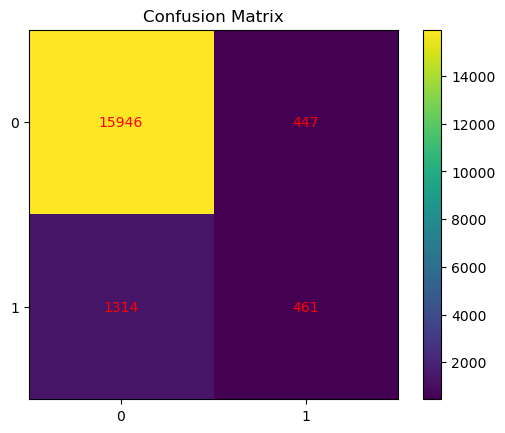

In [115]:
# Plotting the matrix
plt.imshow(cm, cmap='viridis')
plt.colorbar()

# Adding labels for x and y axes
plt.xticks(ticks=[0, 1])
plt.yticks(ticks=[0, 1])

# Displaying numbers in each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j],ha='center', va='center',color='r')

plt.title('Confusion Matrix')
plt.savefig('CM.png')
plt.show()


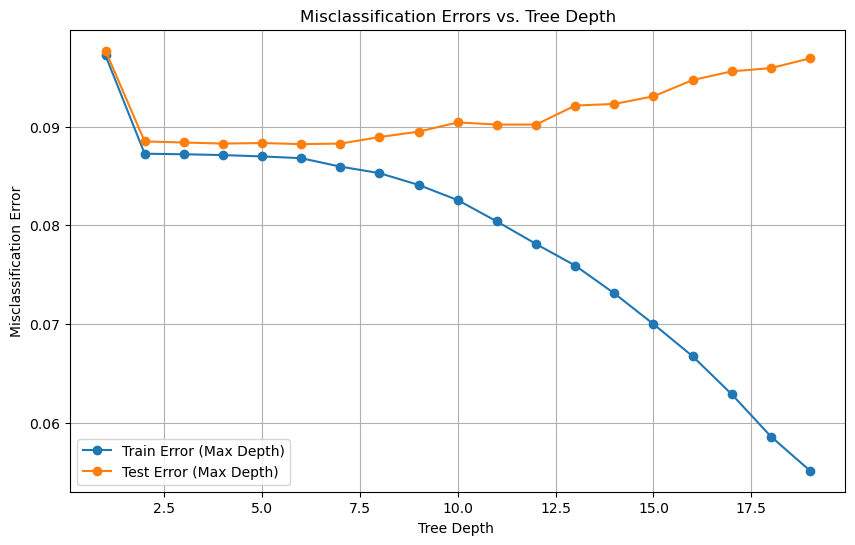

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), train_errors[:19], label='Train Error (Max Depth)', marker='o') 
plt.plot(range(1, 20), test_errors[:19], label='Test Error (Max Depth)', marker='o') 
plt.xlabel('Tree Depth ')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Errors vs. Tree Depth')
plt.legend()
plt.grid(True)
plt.savefig('ErrorVsDepth.png')
plt.show()

# F1 score

In [120]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_test_pred)

In [121]:
print('f1 score =',f1)

f1 score = 0.3436451733134551


# F1 score Interpretation

Recall the formula for f1 score below.

$F1 =2\frac{\text{Precision * Recall}}{Precision + Recall} $


where,
$\text{Precision}= \frac{TP}{TP+FP}$, $\text{Recall}=\frac{TP}{TP+FN}$

* TP = True Positives --- Actually Positive(Hazardous) & Predicted Positive(Hazardous)
* FP = False Positives --- Actually Negative(Non-hazardous) & Predicted Positive(Hazardous)
* FN = False Negatives --- Actually Positive(Hazardous) & Predicted Negative(Non-hazardous)


In [122]:
y_test = np.array(y_test) #actual labels in the testing set
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
y_test_pred #predicted labels

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
len(y_test_pred) # Number of samples in the testing set

18168

In [125]:
positive_predicted_index = np.where(y_test_pred==1)[0] #This gives where the positively predicted samples are

In [126]:
len(positive_predicted_index) #Number of positively predicted samples

908

In [127]:
# Calculating True positive
TP = np.count_nonzero(y_test[positive_predicted_index]) 
TP

461

In [128]:
#Calculating False positive
FP = np.count_nonzero(y_test[positive_predicted_index]==0)
FP

447

In [129]:
negative_predicted_index = np.where(y_test_pred==0)[0] #This gives where the negatively predicted samples are

In [130]:
len(negative_predicted_index) # Number of negatively predicted samples

17260

In [131]:
#Calculating False negative
FN = np.count_nonzero(y_test[negative_predicted_index])
FN

1314

In [132]:
# Calculate Precision and Recall
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision = ",precision)
print('Recall=',recall)

Precision =  0.5077092511013216
Recall= 0.25971830985915495


So out of all the objected that are predicted to be positive, 50% of them are actually positive.
Out of all the objects that are hazardous, the decision tree classifier only flags 30% of those to be hazardous.

It doesn't seem to do well at catching the hazardous ones??

In [133]:
f1score = 2* (precision*recall)/(precision+recall)
f1score

0.3436451733134551

# f1 score on training

In [94]:
y_train_pred = np.array(y_train_pred)
len(y_train_pred)

72668

In [96]:
y_train = np.array(y_train)

In [97]:
positive_predicted_index = np.where(y_train_pred==1)[0] #This gives where the positively predicted samples are

# Calculating True positive
TP = np.count_nonzero(y_train[positive_predicted_index]) 


#Calculating False positive
FP = np.count_nonzero(y_train[positive_predicted_index]==0)


negative_predicted_index = np.where(y_train_pred==0)[0] #This gives where the negatively predicted samples are

#Calculating False negative
FN = np.count_nonzero(y_train[negative_predicted_index])


# Calculate Precision and Recall
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision = ",precision)
print('Recall=',recall)

Precision =  0.8700745473908413
Recall= 0.23128096249115357


In [98]:
f1score = 2* (precision*recall)/(precision+recall)
f1score

0.36542547243654255

## Decision Trees Average Score Across Different Splits

In [86]:
#Each will store a different splitting
X_trains = []
X_tests = []
y_trains = []
y_tests = []


In [87]:
import random
random_states = random.sample(range(1,50),20)
random_states

[8, 7, 35, 9, 25, 16, 45, 24, 33, 15, 20, 41, 43, 32, 26, 19, 49, 10, 23, 48]

In [88]:
for i in range(0, 20):
    #Train test split
    X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=random_states[i])
    
    X_trains.append(X_train)
    X_tests.append(X_test)
    y_trains.append(y_train)
    y_tests.append(y_test)


In [89]:
all_train_errors= []  # will contain 20 lists for each split. Each list will contain 12 elements for each depth
all_test_errors = []
for i in range(0, 20):
    # errors for each depth
    train_errors = []  # will store error values for each of the 12 decision trees on the training data
    test_errors = []  # errors for each depth

    for max_depth in range(1, 13):
        clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        clf = clf.fit(X_trains[i], y_trains[i])

        y_train_pred = clf.predict(X_trains[i])
        y_test_pred = clf.predict(X_tests[i])

        train_error = 1 - accuracy_score(y_trains[i], y_train_pred)
        test_error = 1 - accuracy_score(y_tests[i], y_test_pred)

        train_errors.append(train_error)
        test_errors.append(test_error)

    all_train_errors.append(train_errors)
    all_test_errors.append(test_errors)

all_train_errors = np.array(all_train_errors)
all_test_errors = np.array(all_test_errors)
average_accuracy_scores_train = np.mean(all_train_errors, axis=0)  # average accuracy scores for each depth
average_accuracy_scores_test = np.mean(all_test_errors, axis=0)  # average accuracy scores for each depth
index_min_train = np.argmin(average_accuracy_scores_train)
min_train = average_accuracy_scores_train[index_min_train]
index_min_test = np.argmin(average_accuracy_scores_test)
min_test = average_accuracy_scores_test[index_min_test]

print(f"Min train error average occurred: {min_train}, at depth {index_min_train+1}")
print(f"Min test error average occurred: {min_test}, at depth {index_min_test+1}")


Min train error average occurred: 0.07842654263224529, at depth 12
Min test error average occurred: 0.08767613386173492, at depth 4


In [ ]:
1-0.08

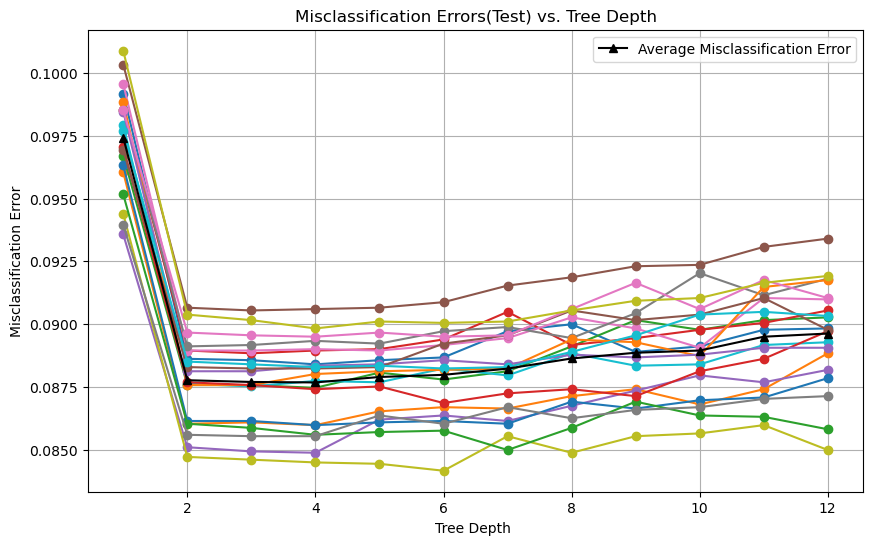

In [134]:
plt.figure(figsize=(10, 6))
for i in range(len(all_test_errors)):   
    # plt.plot(range(1, 20), train_errors[:19], label='Train Error (Max Depth)', marker='o') 
    plt.plot(range(1, 13), all_test_errors[i], marker='o') 
    
plt.plot(range(1,13),average_accuracy_scores_test,label='Average Misclassification Error',marker='^',color='k')
plt.xlabel('Tree Depth ')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Errors(Test) vs. Tree Depth')
plt.legend()

plt.grid(True)
plt.savefig('DTaverage.png')
plt.show()